In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GAMES = ['hmg', 'hms', 'jc3', 'jc4', 'lis', 'lisbf']

In [3]:
df = []
for game in GAMES:
    
    print(game)
    
    data = pd.read_csv(f'data\\csv\\cleaned\\{game}.csv')
    df.append(data)
    
df = pd.concat(df, ignore_index=True)

hmg
hms
jc3
jc4
lis
lisbf


In [4]:
len(df.user_id.unique())

3209336

In [5]:
len(df)

28155199

In [6]:
sessions_descriptives = (
    df
    .groupby(['user_id', 'context'])['session_order']
    .max()
    .reset_index()
    .drop(['user_id'], axis=1)
)

In [7]:
sessions_descriptives.describe()

,session_order
count,3.209336e+06
mean,8.772905e+00
std,5.369866e+00
min,2.000000e+00
25%,4.000000e+00
50%,8.000000e+00
75%,1.200000e+01
max,2.000000e+01


Text(0.5, 0, 'Max N° Sessions')

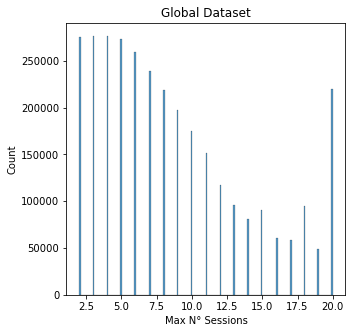

In [8]:
plt.figure(figsize=(5, 5))
sns.histplot(
    sessions_descriptives['session_order'].values, 
)
plt.title('Global Dataset')
plt.xlabel('Max N° Sessions')

In [9]:
sessions_descriptives.groupby('context').describe()

session_order                                                   
                count       mean       std  min   25%   50%    75%   max
context                                                                 
hmg          501649.0   5.498669  2.792588  2.0  3.00   5.0   7.00  15.0
hms          545040.0  13.502295  6.085931  2.0  8.00  15.0  20.00  20.0
jc3          540000.0  11.450000  5.687492  2.0  6.75  11.5  16.25  20.0
jc4          571501.0   8.558722  4.729299  2.0  5.00   8.0  12.00  18.0
lis          533364.0   5.989401  2.918292  2.0  4.00   6.0   8.00  15.0
lisbf        517782.0   7.278463  3.649604  2.0  4.00   7.0  10.00  15.0

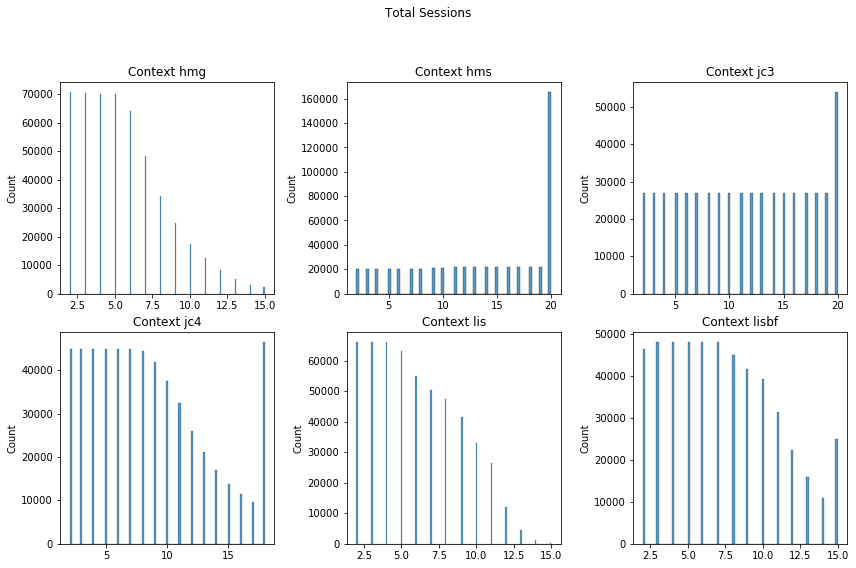

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()
for ind, game in enumerate(GAMES):
    
    game_df = sessions_descriptives[sessions_descriptives['context'] == game]
    sns.histplot(
        game_df['session_order'].values, 
        ax=axs[ind]
    )
    axs[ind].set_title(f'Context {game}')

plt.suptitle(f'Total Sessions')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

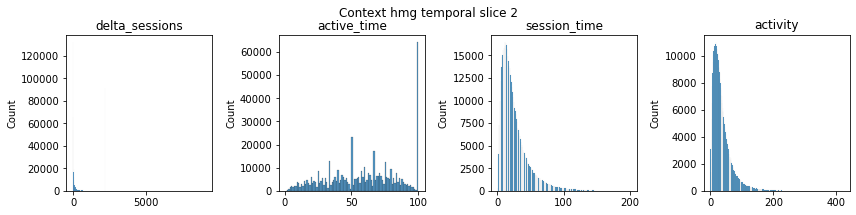

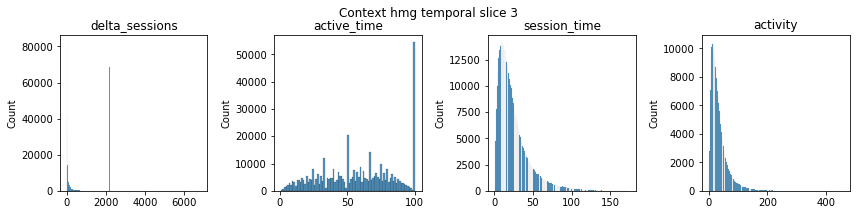

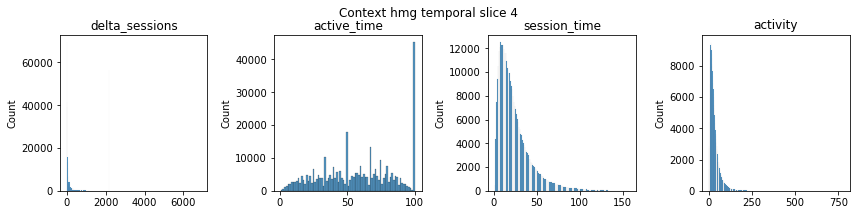

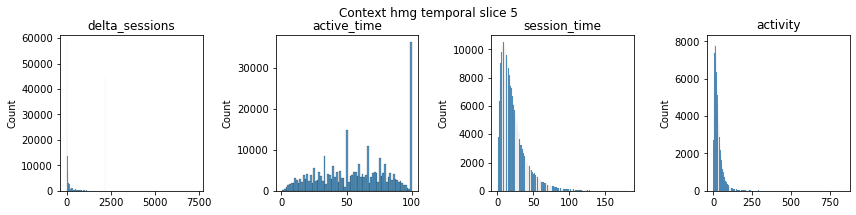

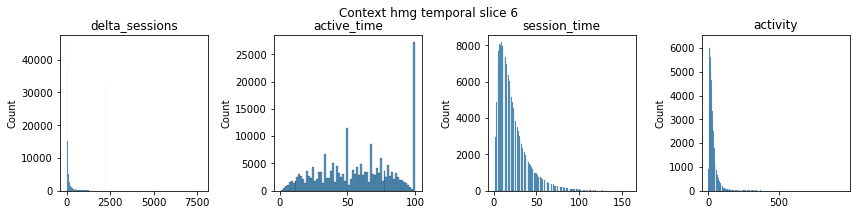

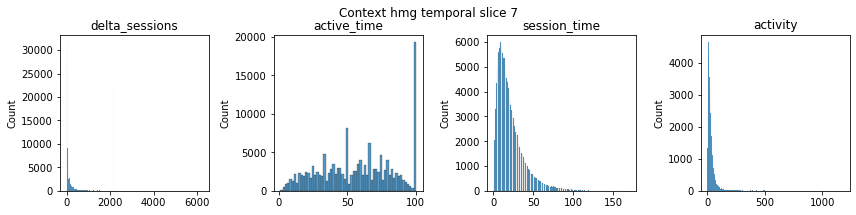

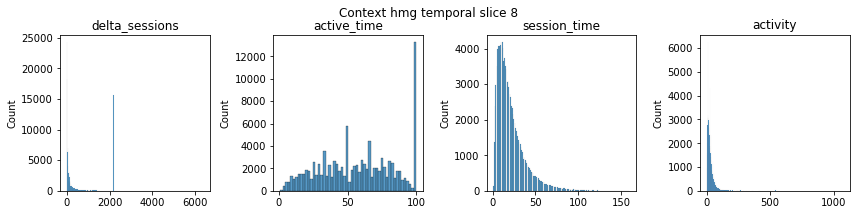

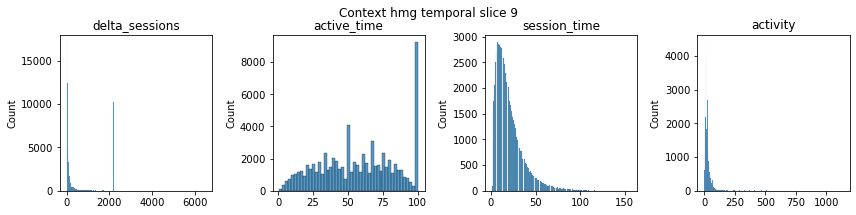

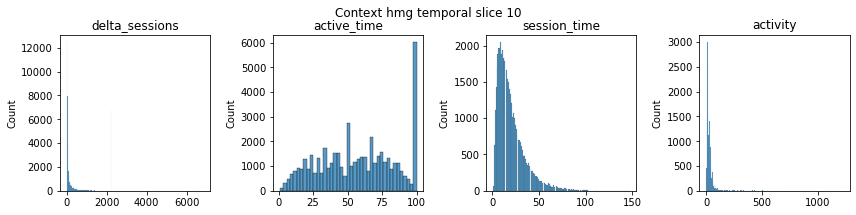

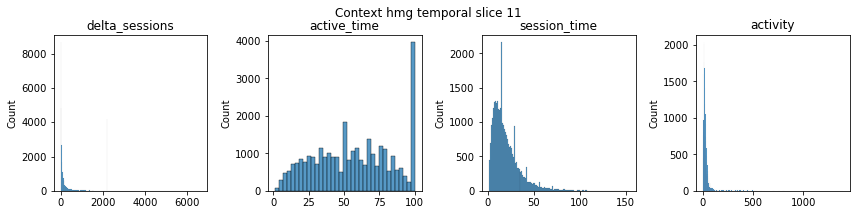

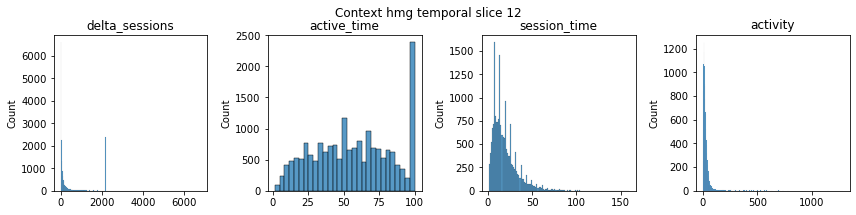

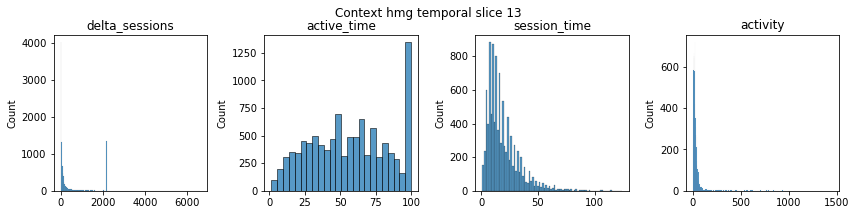

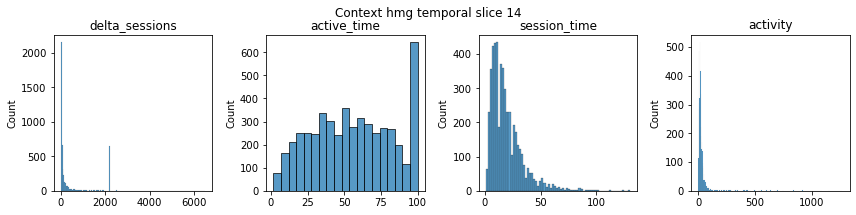

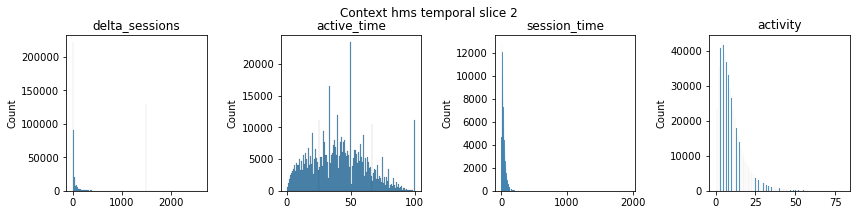

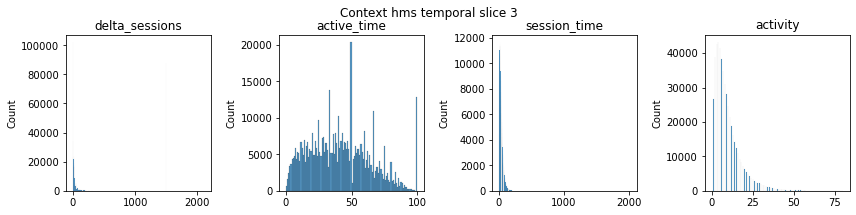

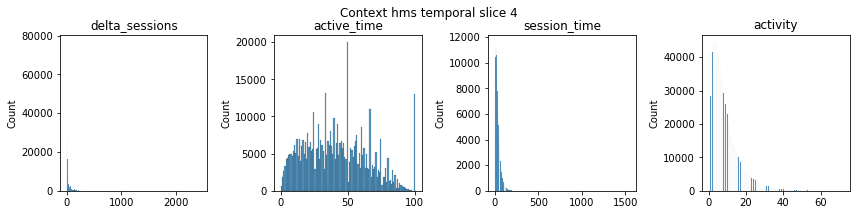

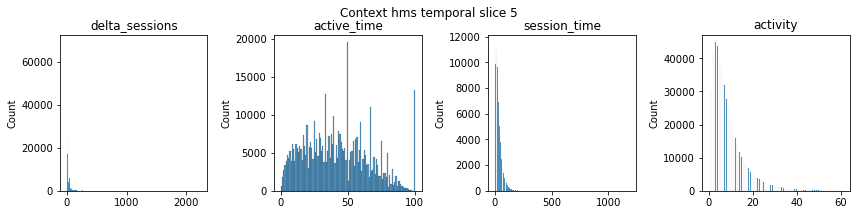

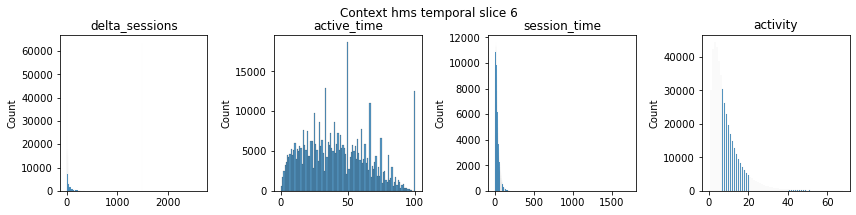

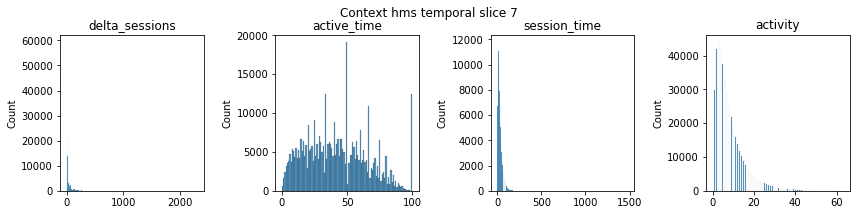

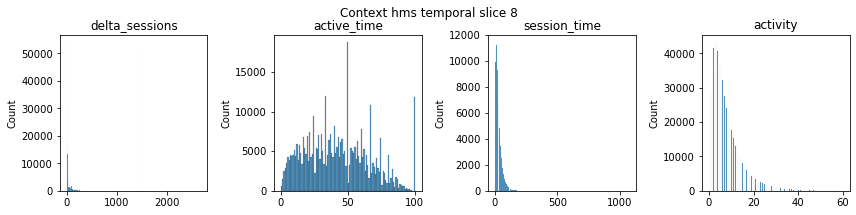

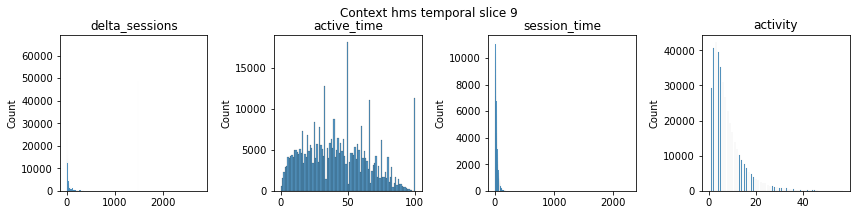

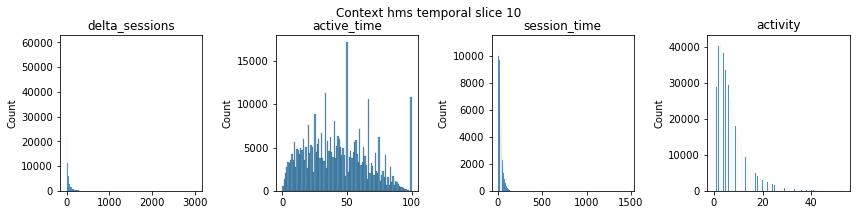

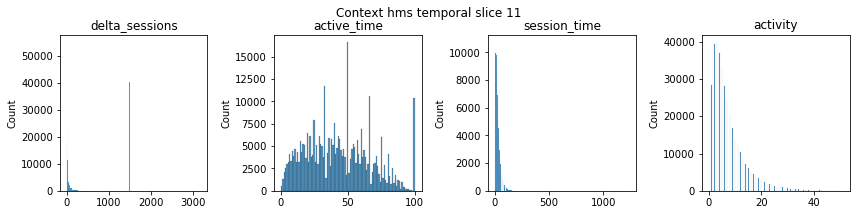

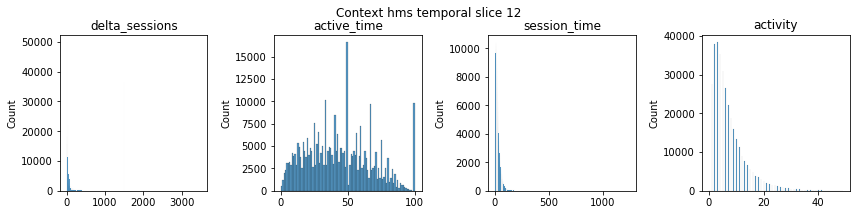

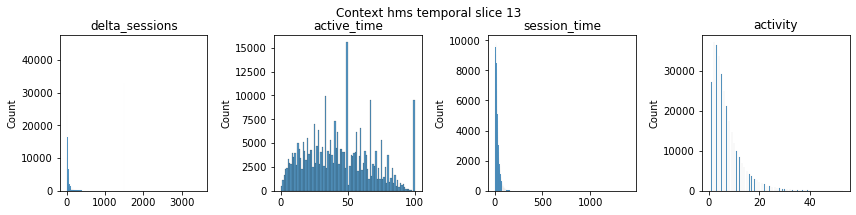

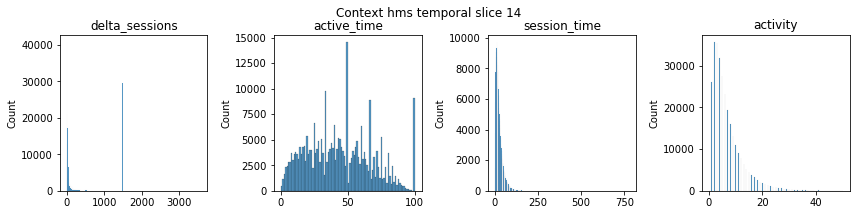

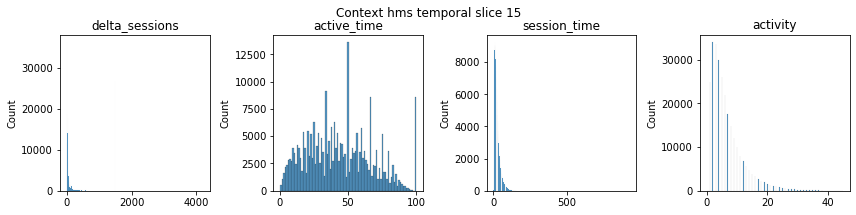

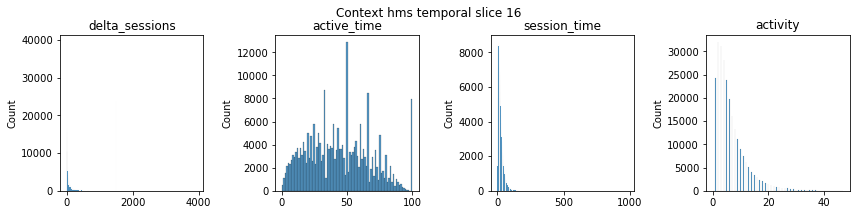

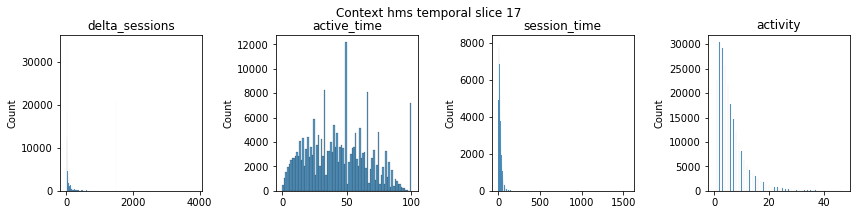

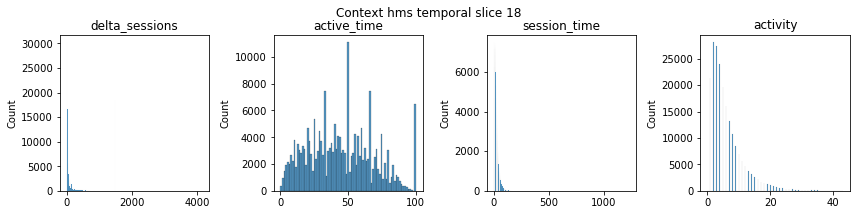

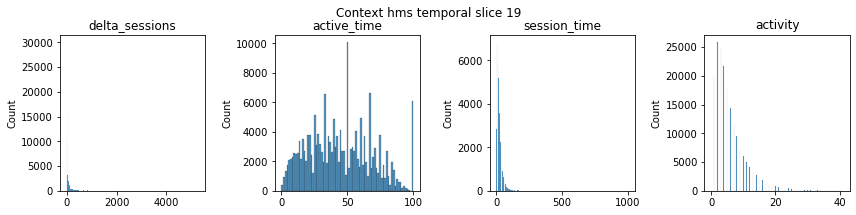

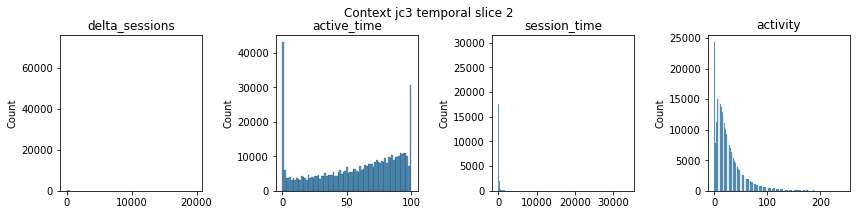

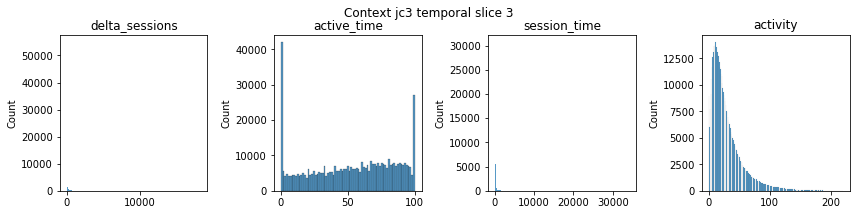

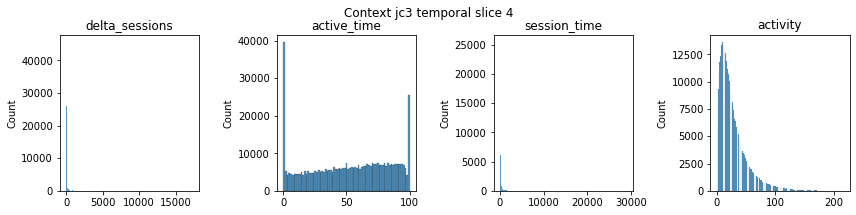

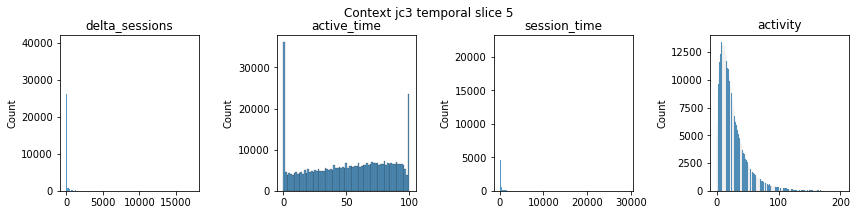

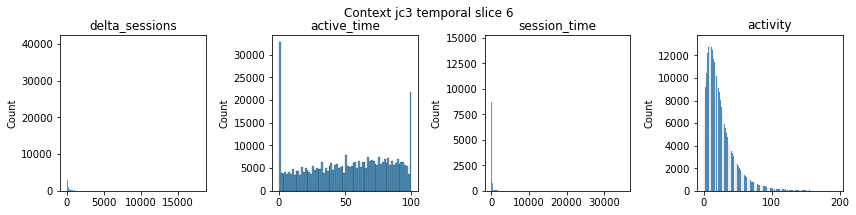

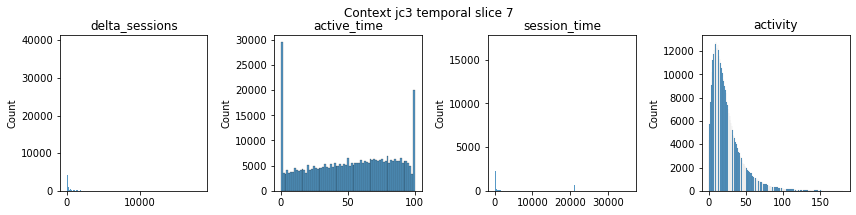

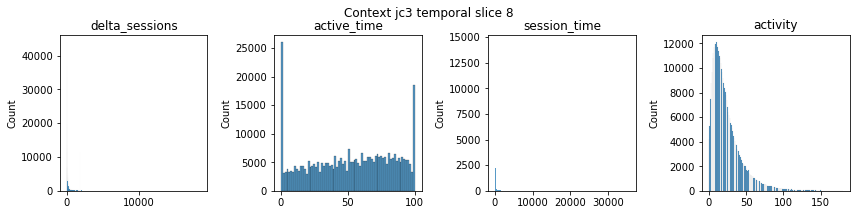

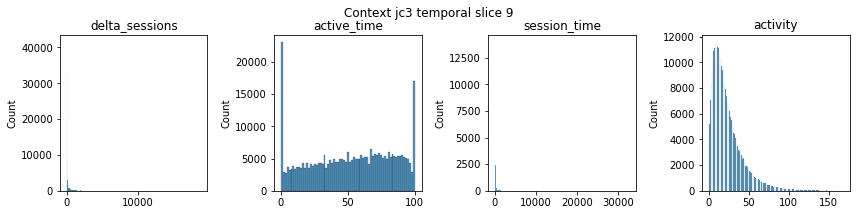

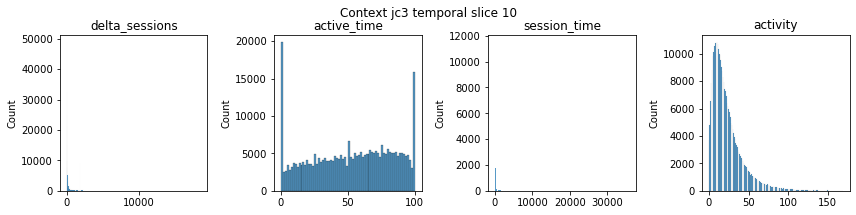

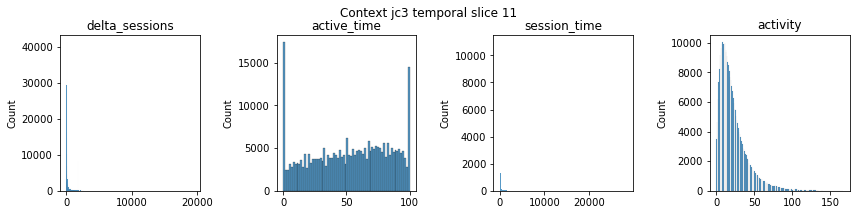

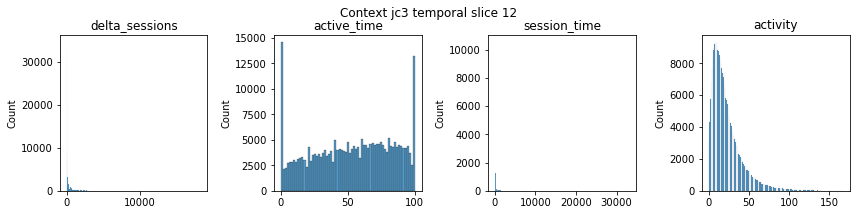

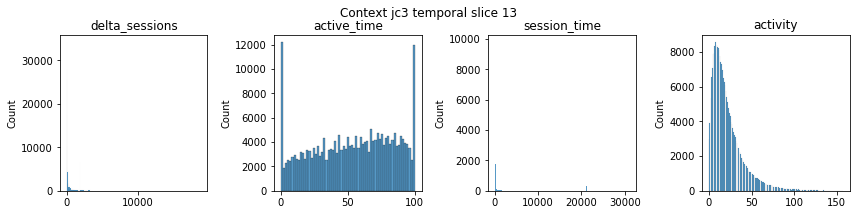

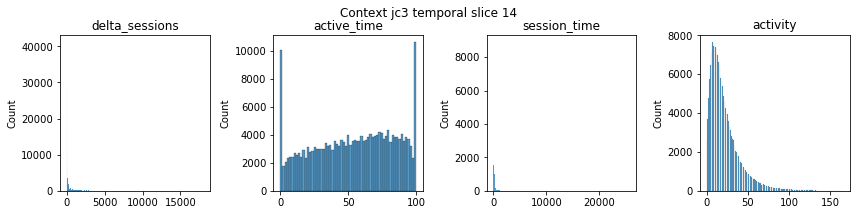

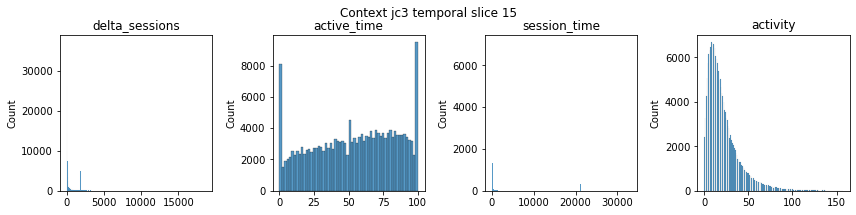

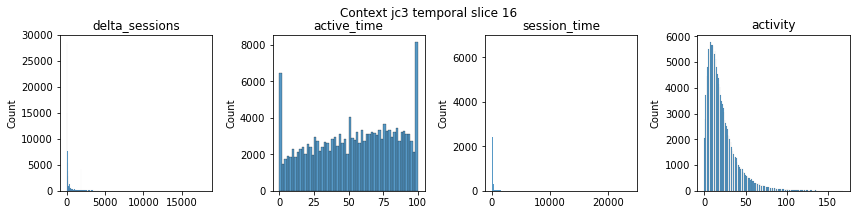

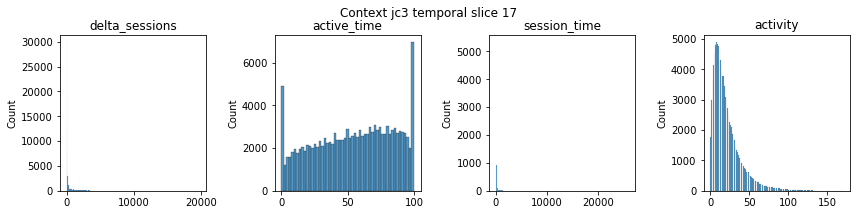

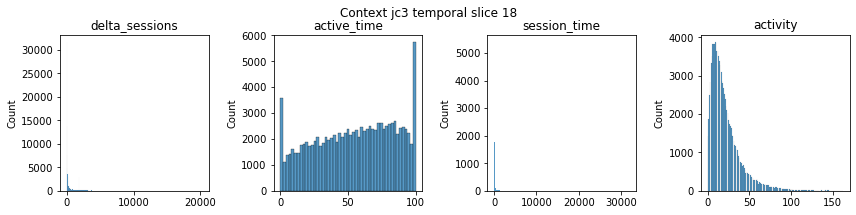

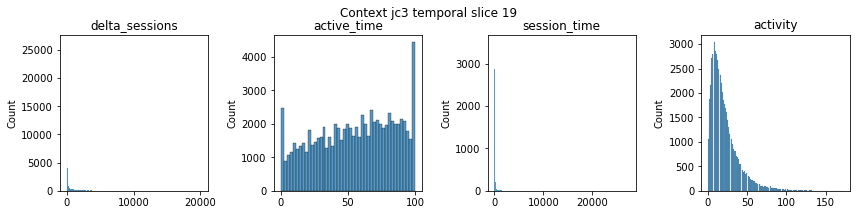

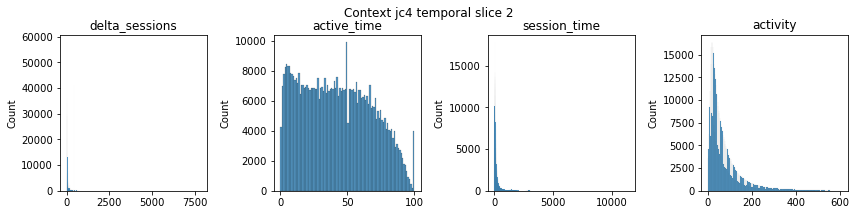

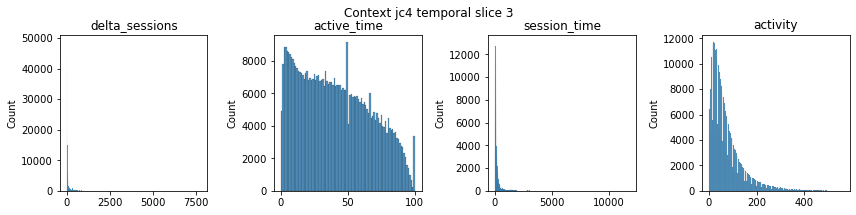

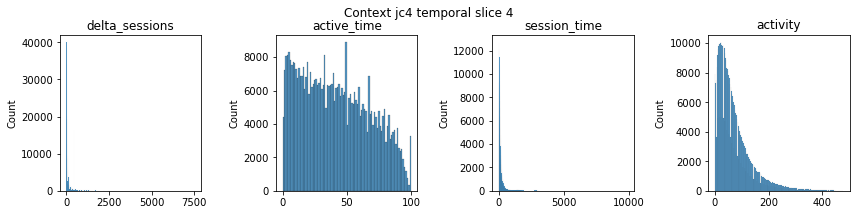

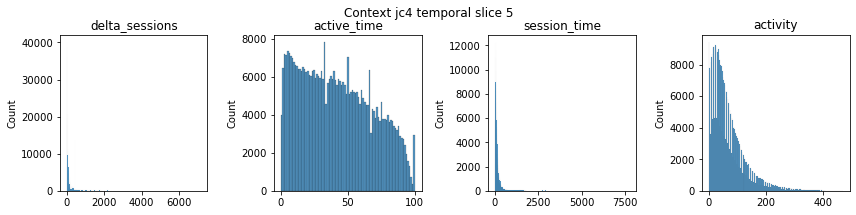

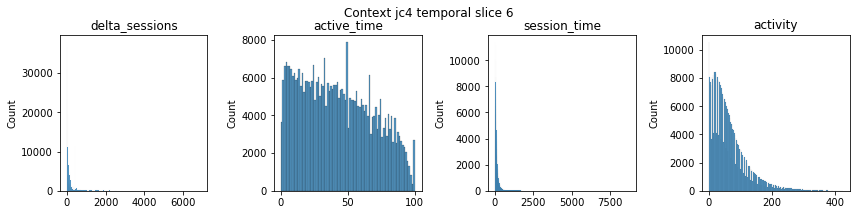

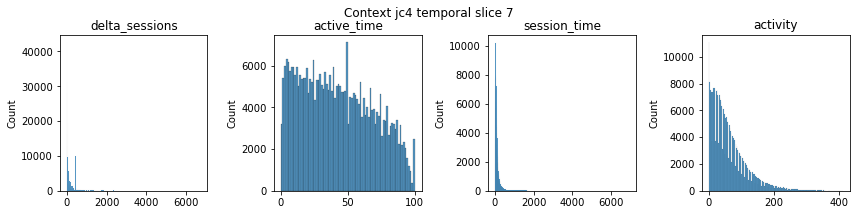

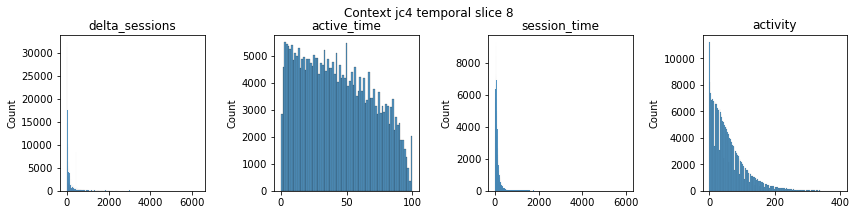

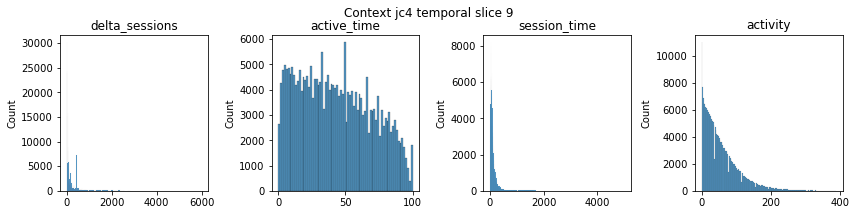

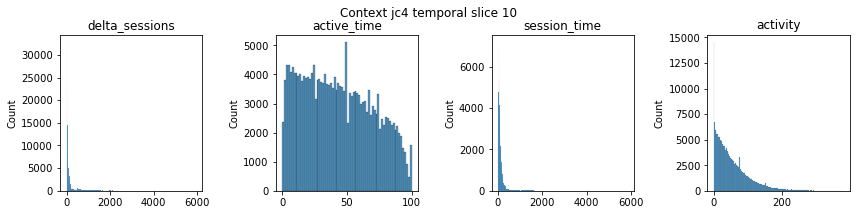

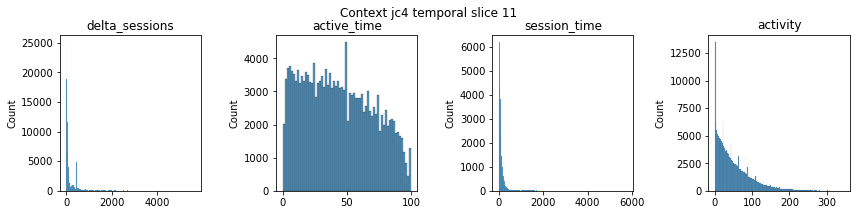

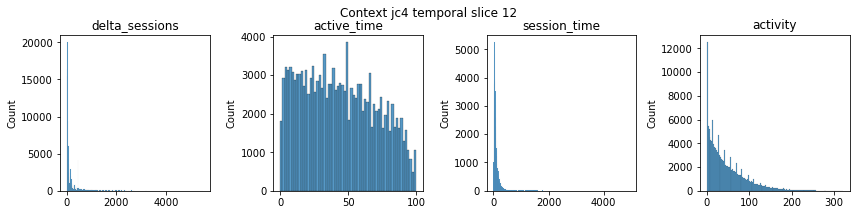

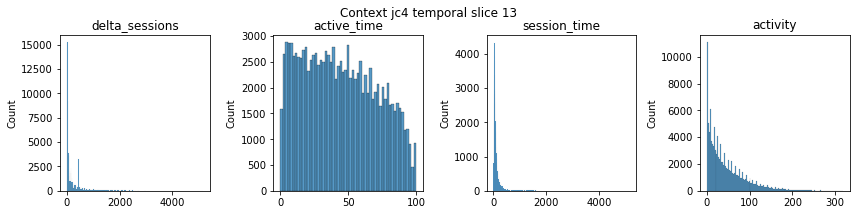

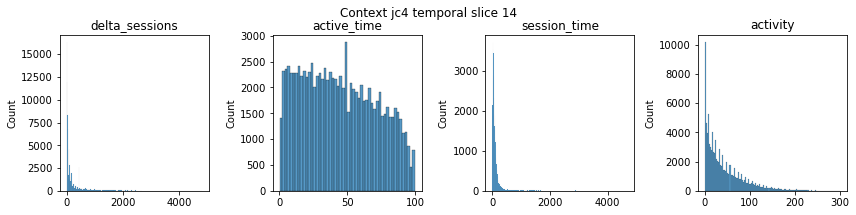

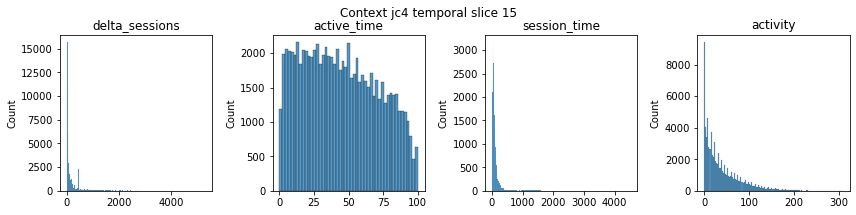

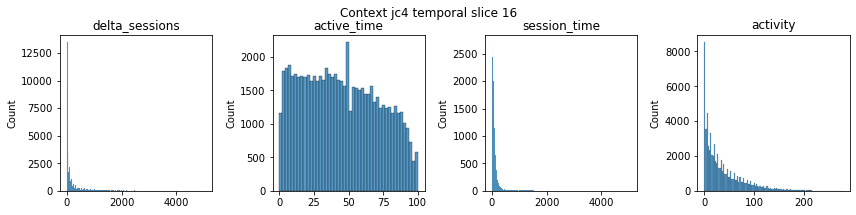

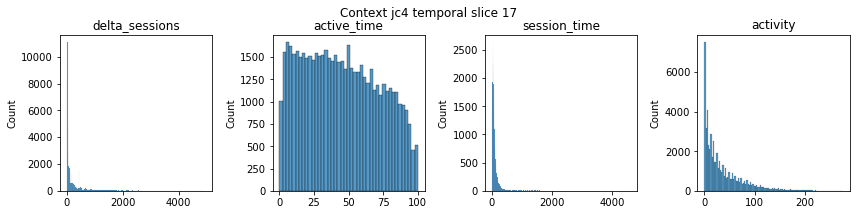

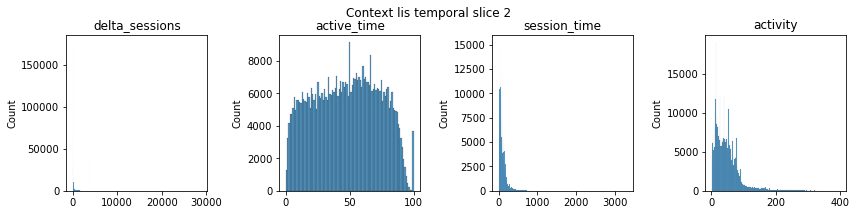

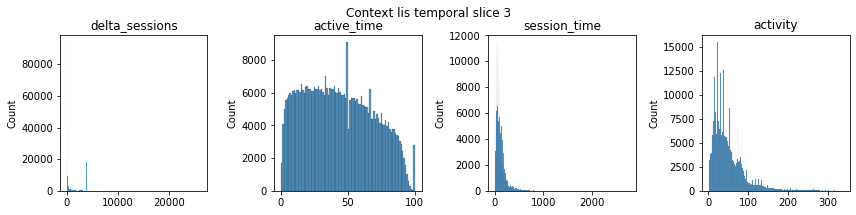

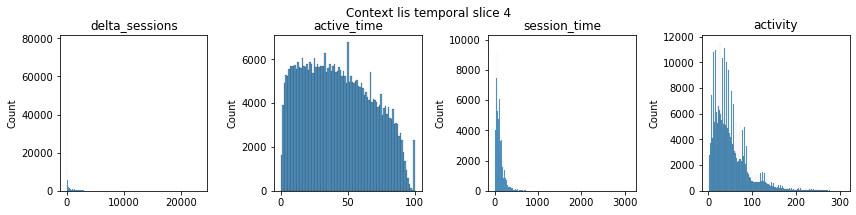

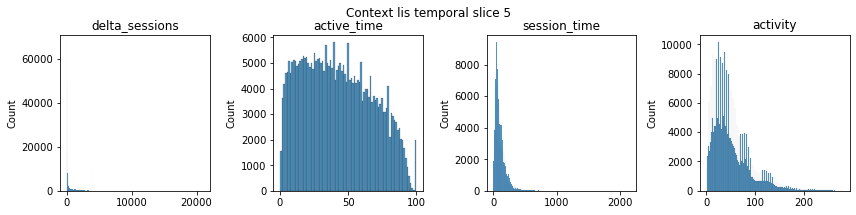

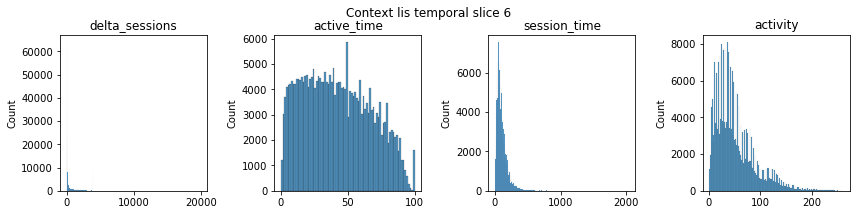

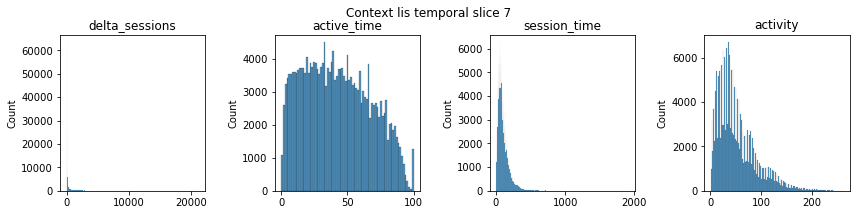

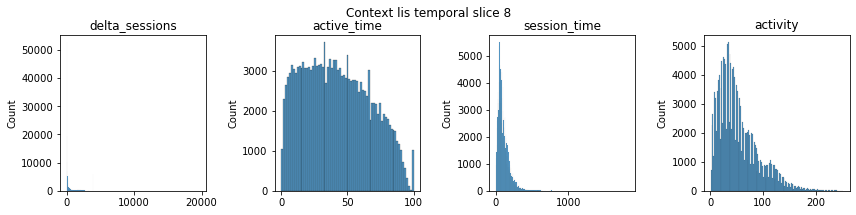

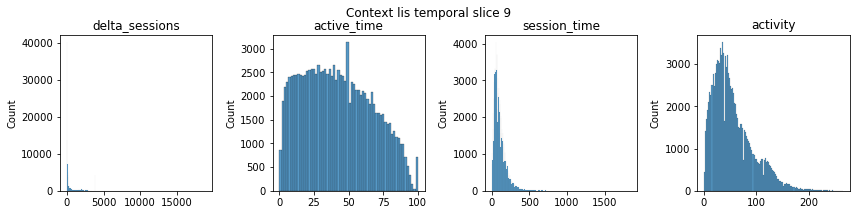

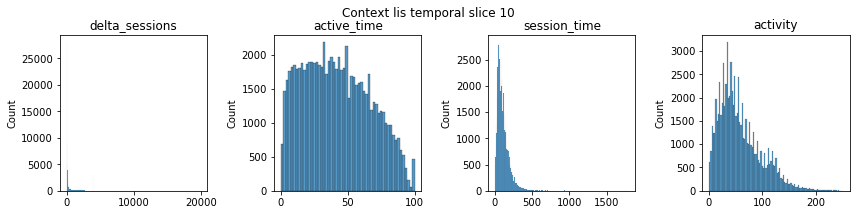

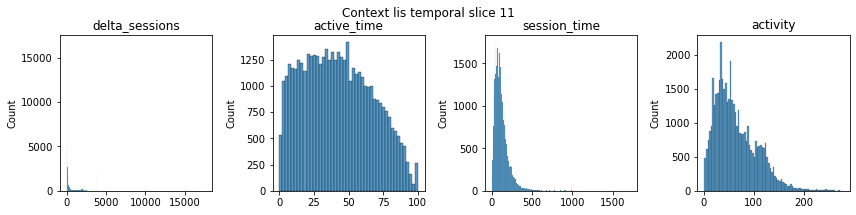

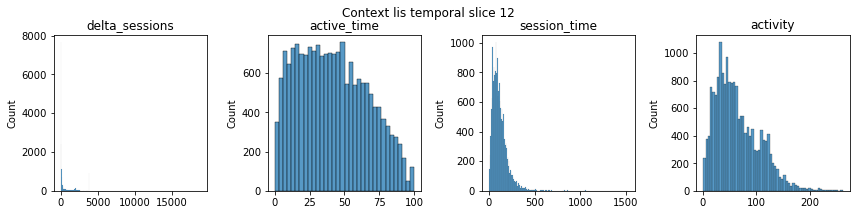

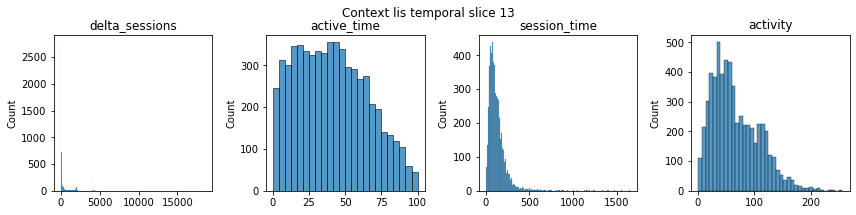

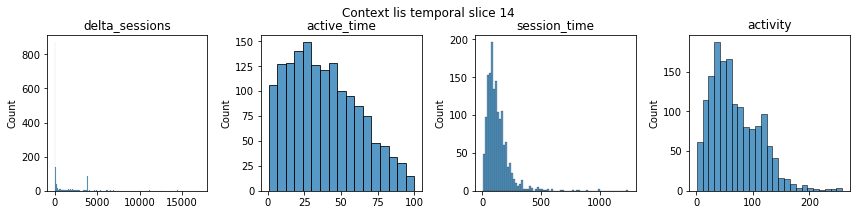

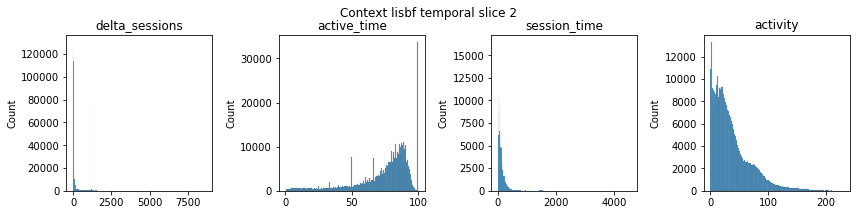

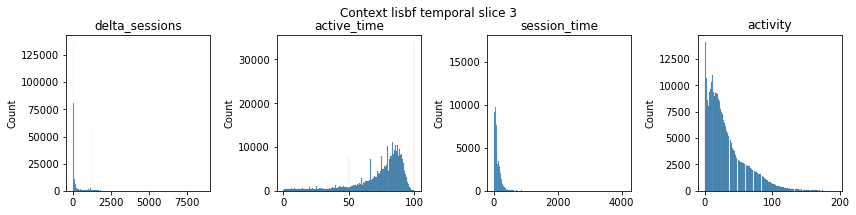

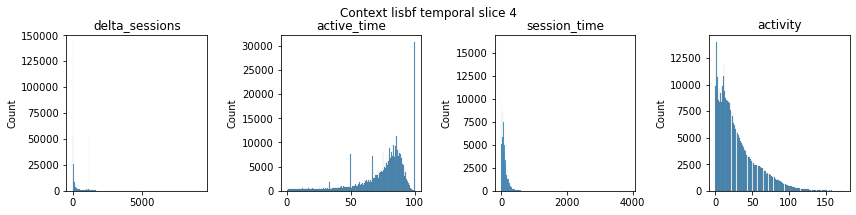

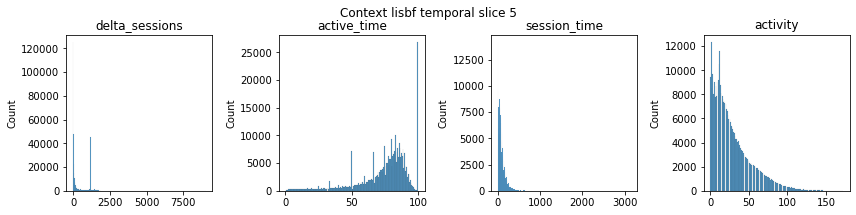

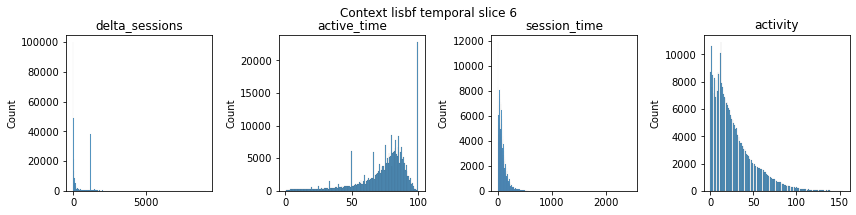

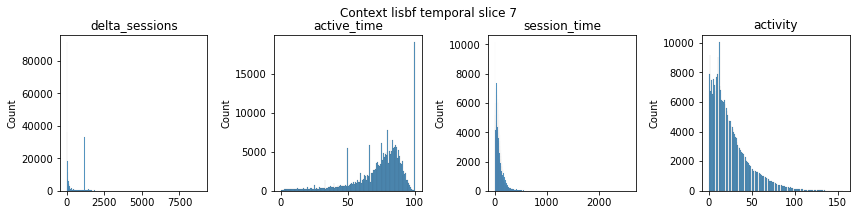

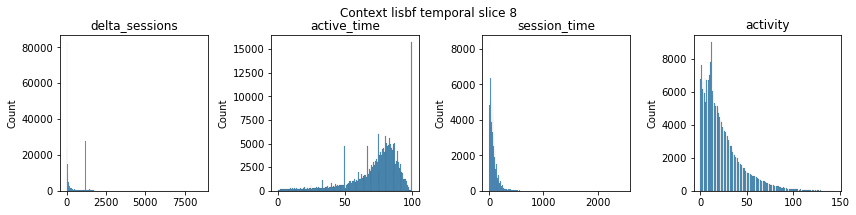

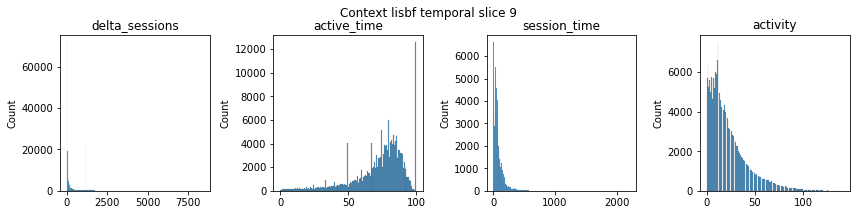

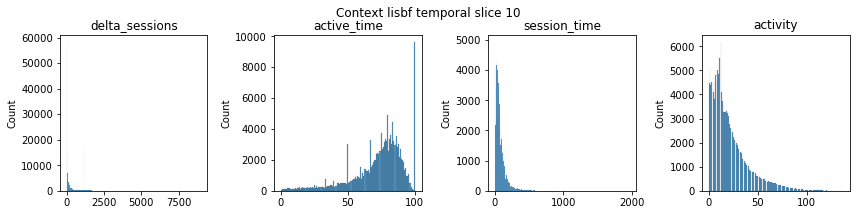

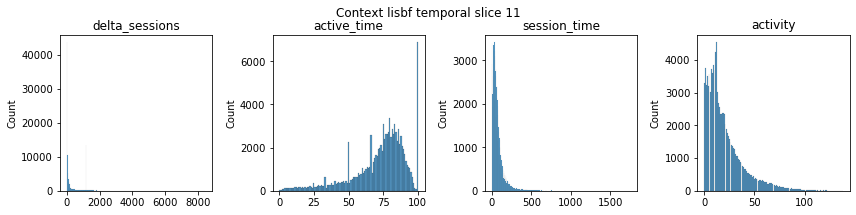

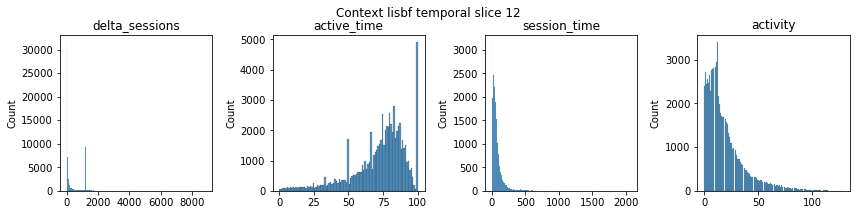

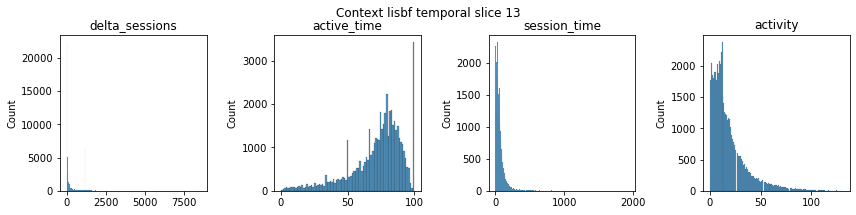

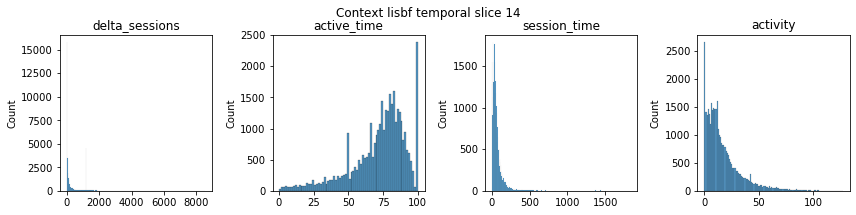

In [11]:
features = [
    'delta_sessions',
    'active_time',
    'session_time',
    'activity'
]
for game in GAMES:
    
    game_df = df[df['context'] == game]
    
    for session in range(2, game_df['session_order'].max()):

        fig, axs = plt.subplots(1, 4, figsize=(12, 3))
        for ind, ax in enumerate(axs.flatten()):

            temporal_slice = game_df[
                game_df['session_order'] == session
            ]
            
            if len(temporal_slice) == 0:
                continue

            temporal_slice = temporal_slice[features].values
            sns.histplot(
                temporal_slice[:, ind], 
                ax=ax
            )
            ax.set_title(f'{features[ind]}')
        
        plt.suptitle(f'Context {game} temporal slice {session}')
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

In [12]:
df.groupby('context')['user_id'].nunique()

context
hmg      501649
hms      545040
jc3      540000
jc4      571501
lis      533364
lisbf    517782
Name: user_id, dtype: int64

In [13]:
for i in ['session_order', 'delta_sessions', 'active_time', 'session_time', 'activity']:
    
    x = df.groupby('context')[i].describe(percentiles=[0.05, 0.25, 0.75, 0.90, 0.95])
    display(x)
    print(i)
    print(x['75%'].values - x['25%'].values)

,count,mean,std,min,5%,25%,50%,75%,90%,95%,max
context,,,,,,,,,,,
hmg,2758402.0,3.958464,2.635981,1.0,1.0,2.0,3.0,5.0,8.0,9.0,15.0
hms,7359291.0,8.622710,5.420810,1.0,1.0,4.0,8.0,13.0,17.0,18.0,20.0
jc3,6183000.0,7.637555,4.980713,1.0,1.0,3.0,7.0,11.0,15.0,17.0,20.0
jc4,4891318.0,6.085995,4.202952,1.0,1.0,3.0,5.0,9.0,12.0,15.0,18.0
lis,3194531.0,4.205657,2.690052,1.0,1.0,2.0,4.0,6.0,8.0,9.0,15.0
lisbf,3768657.0,5.054231,3.321149,1.0,1.0,2.0,4.0,7.0,10.0,11.0,15.0


session_order
[3. 9. 8. 6. 4. 5.]


,count,mean,std,min,5%,25%,50%,75%,90%,95%,max
context,,,,,,,,,,,
hmg,2758402.0,2480.405854,6037.854358,1.0,2.0,19.0,84.0,2188.941317,6244.000000,16695.0,40084.0
hms,7359291.0,1667.159975,5188.750361,1.0,1.0,8.0,24.0,206.000000,1487.116985,16958.0,38441.0
jc3,6183000.0,1883.973575,5480.155330,1.0,3.0,20.0,64.0,508.000000,4083.000000,14776.0,35087.0
jc4,4891318.0,452.129427,926.461032,1.0,3.0,20.0,64.0,426.000000,1547.000000,2659.0,8898.0
lis,3194531.0,3991.989242,8566.867768,1.0,4.0,23.0,143.0,3027.000000,15091.000000,24878.0,42452.0
lisbf,3768657.0,1307.266455,3211.641550,1.0,2.0,19.0,71.0,1181.923396,3049.000000,8449.0,19799.0


delta_sessions
[2169.94131711  198.          488.          406.         3004.
 1162.92339605]


,count,mean,std,min,5%,25%,50%,75%,90%,95%,max
context,,,,,,,,,,,
hmg,2758402.0,61.346945,26.922188,0.58,14.29,40.00,64.060,82.69,100.00,100.00,100.0
hms,7359291.0,43.544768,23.552417,0.07,7.69,25.00,42.860,60.00,75.00,83.33,100.0
jc3,6183000.0,56.411461,32.188809,0.00,0.54,29.71,60.000,85.17,99.62,100.00,100.0
jc4,4891318.0,45.053759,27.022077,0.01,4.64,21.43,44.125,67.71,82.68,88.64,100.0
lis,3194531.0,48.295162,26.508044,0.06,6.62,25.70,48.610,70.90,84.69,89.19,100.0
lisbf,3768657.0,74.078279,20.103333,0.03,29.69,66.67,79.490,87.27,93.33,100.00,100.0


active_time
[42.69 35.   55.46 46.28 45.2  20.6 ]


,count,mean,std,min,5%,25%,50%,75%,90%,95%,max
context,,,,,,,,,,,
hmg,2758402.0,23.409793,19.264023,1.0,4.0,10.0,18.0,31.0,48.0,62.0,201.0
hms,7359291.0,31.263886,33.524937,1.0,5.0,13.0,23.0,40.0,64.0,83.0,2259.0
jc3,6183000.0,1633.843754,5337.468053,1.0,18.0,46.0,90.0,195.0,1094.0,21182.0,35767.0
jc4,4891318.0,218.755104,520.359260,1.0,16.0,46.0,86.0,170.0,384.0,898.0,11731.0
lis,3194531.0,109.638169,131.490447,1.0,13.0,43.0,79.0,135.0,212.0,287.0,3304.0
lisbf,3768657.0,110.868489,183.410780,1.0,5.0,32.0,68.0,129.0,217.0,305.0,4573.0


session_time
[ 21.  27. 149. 124.  92.  97.]


,count,mean,std,min,5%,25%,50%,75%,90%,95%,max
context,,,,,,,,,,,
hmg,2758402.0,36.060950,52.285183,0.0,5.0,13.0,24.0,43.0,70.0,95.0,1456.0
hms,7359291.0,8.140453,7.096370,0.0,1.0,3.0,6.0,11.0,17.0,22.0,80.0
jc3,6183000.0,24.103075,22.684864,0.0,1.0,9.0,18.0,32.0,52.0,69.0,243.0
jc4,4891318.0,61.206633,61.273538,0.0,3.0,19.0,43.0,83.0,136.0,181.0,608.0
lis,3194531.0,48.577360,40.079133,1.0,6.0,19.0,39.0,67.0,97.0,127.0,398.0
lisbf,3768657.0,30.253453,28.667458,0.0,1.0,10.0,22.0,42.0,71.0,87.0,259.0


activity
[30.  8. 23. 64. 48. 32.]


In [39]:
for target in ["tar_delta_sessions", "tar_active_time", "tar_session_time", "tar_activity", "tar_sessions"]:
    
    print("")
    print("")
    
    for game in GAMES:
    
        sliced = df[df['context'] == game]
    
        print(target)
        
        percent = sliced[target] / 100
        mean_percent = np.mean(percent)
        median_percent = np.median(percent)
        iqr = np.quantile(percent, .75) - np.quantile(percent, .25)
        
        print(f'{game} - Mean {mean_percent} - Med - {median_percent} - IQR - {iqr}')




tar_delta_sessions
hmg - Mean 4.214908570315704 - Med - 0.24 - IQR - 1.67
tar_delta_sessions
hms - Mean 2.384278296949866 - Med - 0.2 - IQR - 0.75
tar_delta_sessions
jc3 - Mean 5.171493200027633 - Med - 0.42 - IQR - 1.75
tar_delta_sessions
jc4 - Mean 2.797908388345482 - Med - 0.37 - IQR - 1.4500000000000002
tar_delta_sessions
lis - Mean 9.05856160025611 - Med - 0.44 - IQR - 3.7199999999999998
tar_delta_sessions
lisbf - Mean 3.8305134820904274 - Med - 0.26 - IQR - 3.49


tar_active_time
hmg - Mean 0.47430312891304466 - Med - 0.5 - IQR - 0.5735
tar_active_time
hms - Mean 0.39653656344069066 - Med - 0.3871 - IQR - 0.38460000000000005
tar_active_time
jc3 - Mean 0.48522390242600655 - Med - 0.5081 - IQR - 0.5932000000000001
tar_active_time
jc4 - Mean 0.3748909422777254 - Med - 0.3478 - IQR - 0.48329999999999995
tar_active_time
lis - Mean 0.363228426801931 - Med - 0.3425 - IQR - 0.4909
tar_active_time
lisbf - Mean 0.6364896182910778 - Med - 0.76 - IQR - 0.3571


tar_session_time
hmg - Mean 

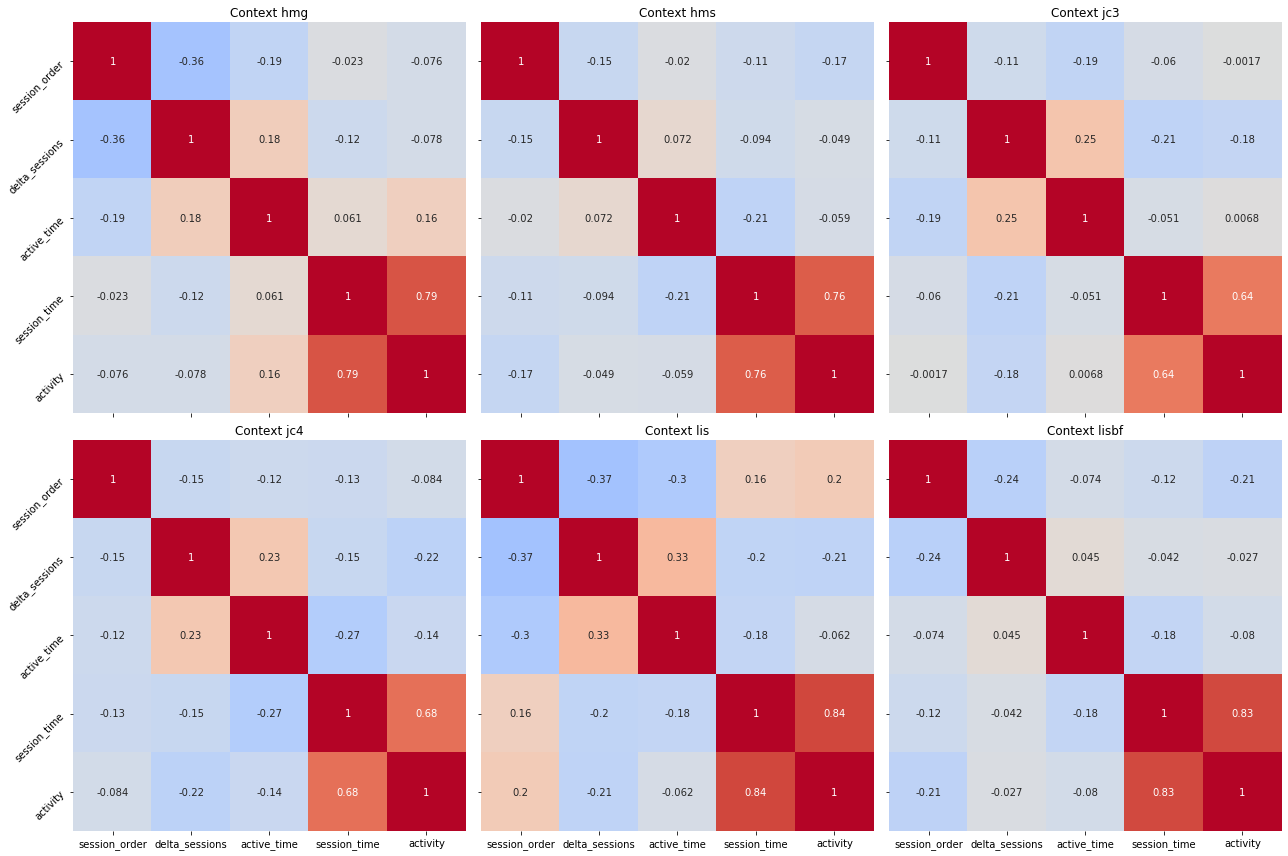

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
axs = axs.flatten()
metrics = [
    'session_order', 
    'delta_sessions', 
    'active_time', 
    'session_time', 
    'activity'
]
for ax, game in zip(axs, GAMES):
    
    sliced = df[df['context'] == game]
    corr = sliced[metrics].corr(method='spearman').values
    sns.heatmap(
        corr,
        vmin=-1,
        vmax=1,
        cmap='coolwarm',
        annot=True,
        ax=ax,
        cbar=False
    )

    ax.set_title(f'Context {game}')
    ax.set_xticklabels(metrics)
    ax.set_yticklabels(metrics, rotation=45)
    
plt.tight_layout()
plt.show()